In [5]:
!pip install hdbscan --quiet

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from hdbscan import HDBSCAN
from sklearn.cluster import DBSCAN

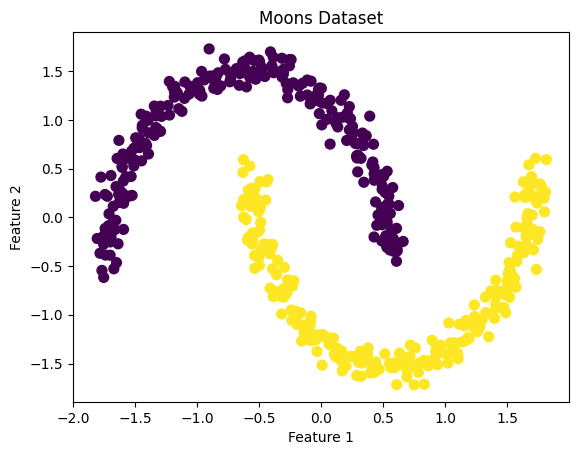

In [7]:
# Generate a synthetic dataset (Moons)
X, y = make_moons(n_samples=500, noise=0.05, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualize the dataset
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', s=50)
plt.title("Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Silhouette Score (HDBSCAN): 0.39


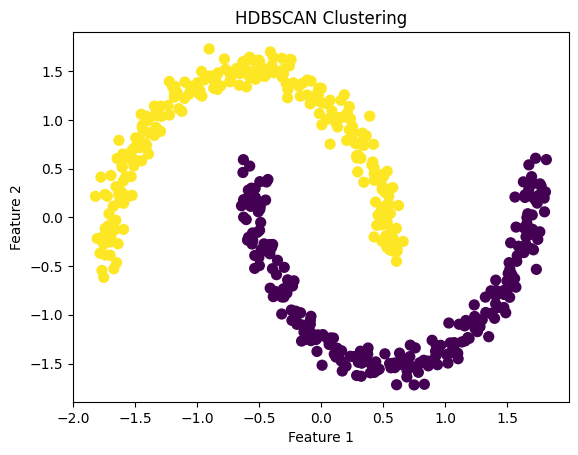

In [8]:
# Perform HDBSCAN clustering
hdbscan_model = HDBSCAN(min_cluster_size=10, min_samples=5, cluster_selection_epsilon=0.1)
hdbscan_labels = hdbscan_model.fit_predict(X_scaled)

# Evaluate clustering performance
silhouette_avg = silhouette_score(X_scaled, hdbscan_labels)
print(f"Silhouette Score (HDBSCAN): {silhouette_avg:.2f}")

# Visualize the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=hdbscan_labels, cmap='viridis', s=50)
plt.title("HDBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Silhouette Score (DBSCAN): 0.39


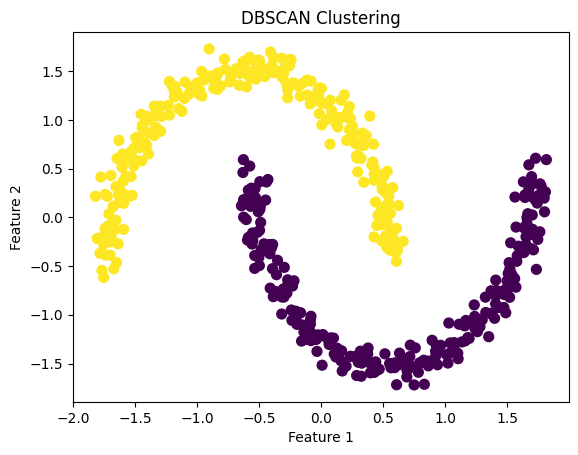

In [11]:
# Perform DBSCAN clustering
dbscan_model = DBSCAN(eps=0.2, min_samples=5)
dbscan_labels = dbscan_model.fit_predict(X_scaled)

# Evaluate clustering performance
silhouette_avg_dbscan = silhouette_score(X_scaled, dbscan_labels)
print(f"Silhouette Score (DBSCAN): {silhouette_avg_dbscan:.2f}")

# Visualize the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis', s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

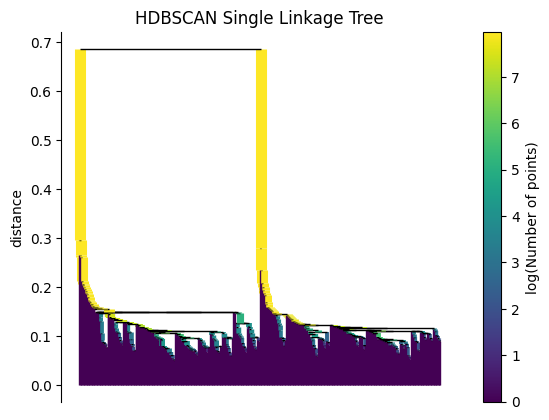

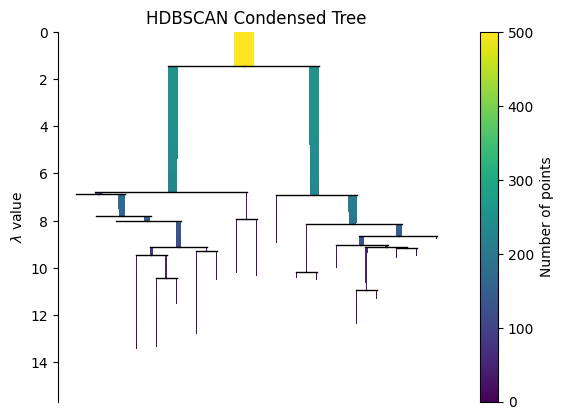

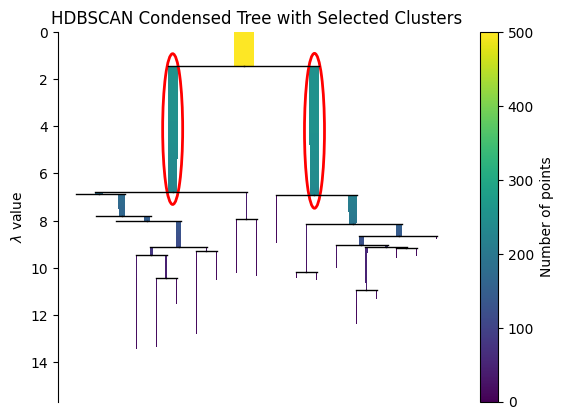

In [15]:
# Visualize the Single Linkage Tree
hdbscan_model.single_linkage_tree_.plot(cmap='viridis', colorbar=True)
plt.title("HDBSCAN Single Linkage Tree")
plt.show()

# Visualize the Condensed Tree
hdbscan_model.condensed_tree_.plot()
plt.title("HDBSCAN Condensed Tree")
plt.show()


# Visualize the Condensed Tree with Cluster Selection
hdbscan_model.condensed_tree_.plot(select_clusters=True)
plt.title("HDBSCAN Condensed Tree with Selected Clusters")
plt.show()

In [16]:
# Create a comparison table
comparison = pd.DataFrame({
    "Algorithm": ["HDBSCAN", "DBSCAN"],
    "Silhouette Score": [silhouette_avg, silhouette_avg_dbscan]
})
print(comparison)

  Algorithm  Silhouette Score
0   HDBSCAN          0.389338
1    DBSCAN          0.389338


1. **Concepts**

### Clustering
Clustering is an unsupervised learning technique used to group similar data points into clusters based on their features. Unlike classification, clustering does not rely on labeled data.

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
DBSCAN is a density-based clustering algorithm that groups points that are closely packed together.  
It identifies clusters based on two parameters:  
- **eps**: The maximum distance between two points to be considered neighbors.  
- **min_samples**: The minimum number of points required to form a dense region (a cluster).  

DBSCAN can detect arbitrary-shaped clusters and mark outliers as noise.

### HDBSCAN (Hierarchical DBSCAN)
HDBSCAN is an extension of DBSCAN that builds a hierarchy of clusters and selects the most stable clusters.  
- It does not require the **eps** parameter, as it automatically determines the optimal cluster structure.  
- HDBSCAN is particularly useful for datasets with varying densities.

---

2. **Methods and Algorithms**

### HDBSCAN Algorithm
- **Mutual Reachability Distance**: Computes the distance between points, adjusted for density.  
- **Minimum Spanning Tree**: Constructs a graph where points are connected based on the mutual reachability distance.  
- **Condensed Tree**: Builds a hierarchy of clusters by progressively merging clusters based on density.  
- **Cluster Stability**: Selects the most stable clusters from the hierarchy.

### Evaluation Metrics
- **Silhouette Score**: Measures how well points are clustered. A higher score indicates better-defined clusters.  
- **Cluster Hierarchy Visualization**: The Single Linkage Tree and Condensed Tree provide insights into the clustering process.

---

3. **Results and Plots**

### a. Single Linkage Tree
- **What It Shows**:  
    The Single Linkage Tree represents the hierarchical clustering process.  
    It shows how clusters are merged at different density levels.  

- **How to Interpret**:  
    - The x-axis represents the data points, and the y-axis represents the distance at which clusters are merged.  
    - Larger gaps between merges indicate more stable clusters.

### b. Condensed Tree
- **What It Shows**:  
    The Condensed Tree simplifies the Single Linkage Tree by focusing on stable clusters.  
    It highlights clusters that persist across a range of density thresholds.  

- **How to Interpret**:  
    - Each branch represents a cluster, and the width of the branch indicates its stability.  
    - Wider branches correspond to more stable clusters.

### c. Condensed Tree with Selected Clusters
- **What It Shows**:  
    Highlights the clusters selected by HDBSCAN based on stability.  

- **How to Interpret**:  
    - Selected clusters are marked, and noise points are excluded.

### d. Cluster Visualization
- **What It Shows**:  
    A scatter plot of the data points colored by their cluster labels.  
    Noise points are typically marked with a distinct color (e.g., -1).  

- **How to Interpret**:  
    - Points in the same cluster should be close together, while points in different clusters should be well-separated.

---

4. **Example Workflow in the Notebook**

### Step 1: Load and Preprocess Data
- Load a dataset (e.g., synthetic or real-world data).  
- Standardize the data using **StandardScaler** to ensure features are on the same scale.

### Step 2: Perform HDBSCAN Clustering
- Fit the HDBSCAN model to the data.  
- Extract cluster labels and evaluate the clustering performance using metrics like the **Silhouette Score**.

### Step 3: Visualize Results
- Plot the Single Linkage Tree to understand the hierarchical clustering process.  
- Plot the Condensed Tree to identify stable clusters.  
- Visualize the clusters in a scatter plot.

### Step 4: Compare with Other Methods
- Optionally, compare HDBSCAN with other clustering algorithms like DBSCAN or K-Means.

---

5. **Key Insights**
- HDBSCAN is effective for datasets with varying densities and does not require the **eps** parameter.  
- The Single Linkage Tree and Condensed Tree provide valuable insights into the clustering process.  
- The **Silhouette Score** helps evaluate the quality of clustering.  
- HDBSCAN can identify noise points, which are often ignored by other clustering algorithms.

